<a href="https://colab.research.google.com/github/mrunalini-ch/Deep-Learning/blob/main/Lab_and_Programming_assignment_1(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 1 (30/12/24)**

***Implement a perceptron for binary classification(AND gate)***

**key features:**
1. includes step_function for activation
2. implementa a perceptron class with methods for prediction and training.
3. uses random initialization for weights and bias.
4. Trains the perceptron using sample data for ANd gate.
5. Outuputs test predictions

In [ ]:
import numpy as np

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return step_function(summation)

    def train(self, inputs, labels, epochs=100):
        for _ in range(epochs):
            for input_vector, label in zip(inputs, labels):
                prediction = self.predict(input_vector)
                error = label - prediction
                # Update weights and bias
                self.weights += self.learning_rate * error * input_vector
                self.bias += self.learning_rate * error

# Sample data for binary classification (AND gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])  # AND gate output

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels)

# Test the perceptron
print("Test predictions: ")
for input_vector in inputs:
    prediction = perceptron.predict(input_vector)
    print(f"Input: {input_vector}, Prediction: {prediction}")

Test predictions: 
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


***Test the perceptron with a different dataset (OR gate)***

**key features:**
1. reuses the perceptron class
2. trains and evaluates the perceptron on sample ata for an OR gate.
3. Outputs predictions for each input.


In [ ]:
# Sample data for binary classification (OR gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # OR gate output

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels)

# Test the perceptron
print("Test predictions: ")
for input_vector in inputs:
    prediction = perceptron.predict(input_vector)
    print(f"Input: {input_vector}, Prediction: {prediction}")

Test predictions: 
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


Train on iris dataset

**key features:**
1. Load the iris data set and select binary target labels
2. Splits the data set into training and testing sets
3. Implements and trains a perceptron using custom logic
4. Evaluates the perceptron and princess accuracy

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Select features and labels
X = iris.data[:, (0, 1)]  # Sepal length, sepal width
y = (iris.target == 0).astype(int)  # Binary target: 1 if class 0, else 0

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0).astype(int)  # Ensure integer output

    def fit(self, X, y):
        n_features = X.shape[1]

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Iterate for the number of epochs
        for epoch in range(self.epochs):
            # Loop through the training set
            for i in range(len(X)):
                z = np.dot(X[i], self.weights) + self.bias  # Dot product for one sample
                y_pred = self.activation(z)  # Pass through activation function

                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias  # Dot product for all samples
        return self.activation(z)

# Create a Perceptron instance
perceptron = Perceptron(learning_rate=0.001, epochs=100)

# Train the Perceptron
perceptron.fit(X_train, y_train)

# Make predictions
pred = perceptron.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


**PROGRAMMING ASSIGNMENT-1**

**Step 1:** Select a simple and publicly available data sed for binary classification(ex: Titanic dataset), load the dataset.

**key features:**
1. Load the data set from Github or Kaggle
2. Display the first five rows of the  Dataset
3. provide information about data set columns and types

In [ ]:
# Load the Titanic dataset
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
print(data.head())  # Display the first 5 rows of the dataset
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

**Step 2:** install necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Step 3:** preprocess the dataset

key features:
1. Retains relevant columns in (Pclass, sex, age, fare, survived)
2. Handles missing values in the age column by filling them with the mean
3. Convert to  categorical sex column to numerical format
4. splits the data into features (X) and target (y) for training and testing

In [ ]:
# Preprocessing: Keep relevant columns and create a copy
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()

# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Convert categorical column 'Sex' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Features (X) and target (y)
X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 4:** New step activation function to implement the perceptron model

key features:
1. Implements the perceptron with custom training logic
2. Uses the Titanic data set for binary classification

In [ ]:
# Step activation function
def step_function(z):
    return np.where(z > 0, 1, 0)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []

        for _ in range(self.epochs):
            error_count = 0
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights) + self.bias
                prediction = step_function(z)
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    error_count += 1
            self.errors.append(error_count)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return step_function(z)

# Initialize and train the perceptron
model = Perceptron(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predictions
y_pred_manual = model.predict(X_test)
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_manual))


Perceptron Accuracy: 0.7877094972067039


**Step5**: Implement the perceptron from scratch and using a framework (e.g., Scikit-learn)

In [ ]:
# Preprocessing: Keep relevant columns and handle missing values
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()

# Fill missing values for 'Age' and 'Fare'
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

# Convert categorical column 'Sex' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Features (X) and target (y)
X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no NaN values in training and testing sets
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Train the Perceptron
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=1000, eta0=0.01, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predictions
from sklearn.metrics import accuracy_score
y_pred_sklearn = clf.predict(X_test)
print("Scikit-Learn Perceptron Accuracy:", accuracy_score(y_test, y_pred_sklearn))


Scikit-Learn Perceptron Accuracy: 0.6536312849162011



**Step 6:**: For tracking the progress of perceptron model during training, we can visualize how  total number of errors reduce with each iteration

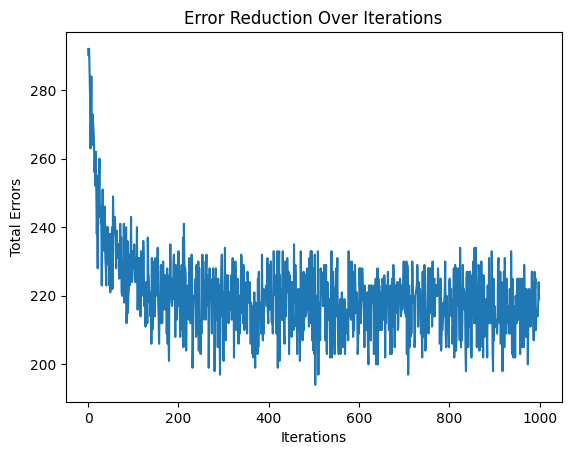

In [ ]:
# Visualize training errors

plt.plot(range(len(model.errors)), model.errors)
plt.xlabel("Iterations")
plt.ylabel("Total Errors")
plt.title("Error Reduction Over Iterations")
plt.show()

**Limitations of the Perceptron**

1. **Inability to Handle Non-Linearly Separable Data:** The Perceptron fails if the data is not linearly separable and cannot converge to a solution. For example, it cannot solve the XOR problem.

2. **No Probabilistic Output:** The Perceptron provides only binary outputs (0 or 1) and does not give the probability of belonging to a class.

3.  **Sensitive to Learning Rate:** A poorly chosen learning rate η can lead to slow convergence or divergence.

4. **Single-Layer Architecture:** The basic Perceptron cannot handle more complex problems involving multiple layers.

**Observations**

**Good Performance for Logical Models:**

1. Predicted labels align with expectations for logic gates (AND/OR).

2. Accuracy metrics reflect strong model training on simple logic datasets.

**Challenges with Missing Data:**

1. Titanic dataset has significant missing values in Age and Cabin.

2. Addressing these gaps is critical for downstream analysis.

**Perceptron Model Accuracy:**

1. Accuracy differences between manual and Scikit-Learn implementations, Potential variations in hyperparameter settings or convergence criteria.

2. Highlights the need for parameter tuning in pre-built models.

**Imbalance in Accuracy:**

1. Logical problems yielded very high accuracy.

2. Perceptron results for more complex datasets underperformed, indicating possible overfitting or poor generalization.

**Visualization Insights:**

1. Plots might demonstrate decision boundaries or distribution of features.